In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [2]:
fake_df = fake_news = pd.read_csv("/Users/aakanshabasera/Downloads/:kaggle:input:fake-news-detection:fake.csv")
real_df = real_news = pd.read_csv("/Users/aakanshabasera/Downloads/:kaggle:input:fake-news-detection:true.csv")

# Display basic information about the datasets
print("Fake News Dataset:")
print(fake_df.info(), "\n")

print("Real News Dataset:")
print(real_df.info())

# Show the first few rows of each dataset
fake_df.head(), real_df.head()

Fake News Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None 

Real News Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [3]:
real_df.shape

(21417, 4)

In [4]:
fake_df.shape

(23481, 4)

In [5]:
fake_news["label"] = 1
real_news["label"] = 0


# Merge both datasets
df = pd.concat([fake_news, real_news], axis=0).reset_index(drop=True)

# Display dataset info after merging
df.info()

# Display first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
df.shape

(44898, 5)

In [7]:
df["text"] = df["text"].str.lower()
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1


In [8]:
# Remove punctuation from text
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1


In [17]:
# Remove numbers from text
df["text"] = df["text"].apply(lambda x: re.sub(r'\d+', '', x))
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",1


In [18]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from text
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",1


In [19]:
!pip install nltk


In [22]:
# Tokenize the text column
df["text"] = df["text"].apply(word_tokenize)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",1


In [21]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aakanshabasera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aakanshabasera/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word in the text column
df["text"] = df["text"].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, american, happy, new, ye...",News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",1


In [24]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aakanshabasera/nltk_data...


True

In [26]:
#lets drop the data colums since it is not that useful 
df.drop(columns=["date"], inplace=True)


In [27]:
# Ensure text column is in string format
df["text"] = df["text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df["text"])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows
X_tfidf_df.head()

,abandon,abandoned,abbas,abc,abdullah,abe,abedin,ability,able,aboard,...,youth,youtube,ypg,zealand,zero,zika,zimbabwe,zinke,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Display the size of each set
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 35918
Testing set size: 8980


Training Random Forest...
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training Naive Bayes...
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4247
           1       0.97      0.94    

Exception ignored in: <function ResourceTracker.__del__ at 0x1080e5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107b01bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105955bc0>
Traceback (most recent call last

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      1.00      4733

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training XGBoost...
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4247
           1       1.00      1.00      1.00      4733

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



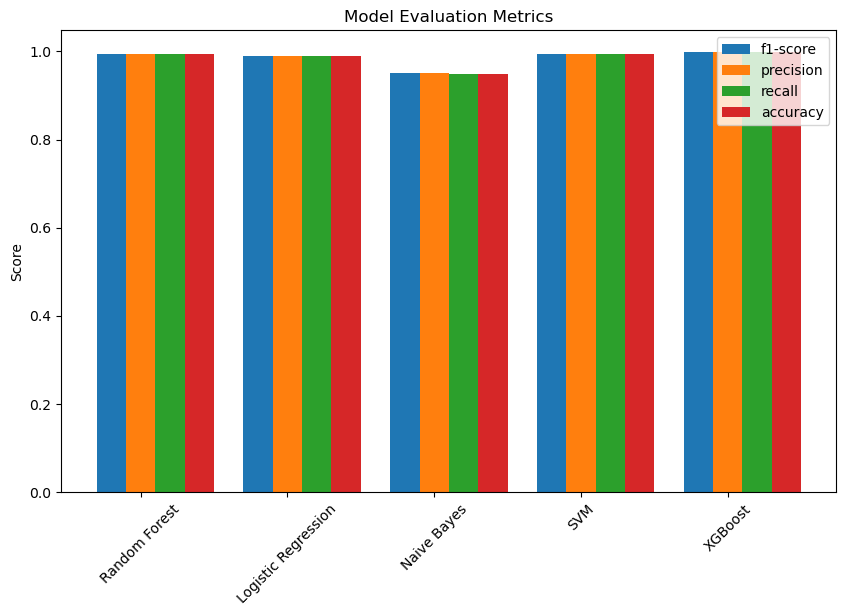

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define models with parallel processing
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),  
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric="mlogloss")
}
# Train models and evaluate performance
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Visualization - F1 Score, Accuracy, Precision, Recall
metrics = ["f1-score", "precision", "recall", "accuracy"]
scores = {metric: [] for metric in metrics}
model_names = []

for name, report in results.items():
    model_names.append(name)
    scores["accuracy"].append(report["accuracy"])
    scores["f1-score"].append(report["weighted avg"]["f1-score"])
    scores["precision"].append(report["weighted avg"]["precision"])
    scores["recall"].append(report["weighted avg"]["recall"])

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, scores[metric], width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.set_title("Model Evaluation Metrics")
ax.set_ylabel("Score")

plt.show()

In [31]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


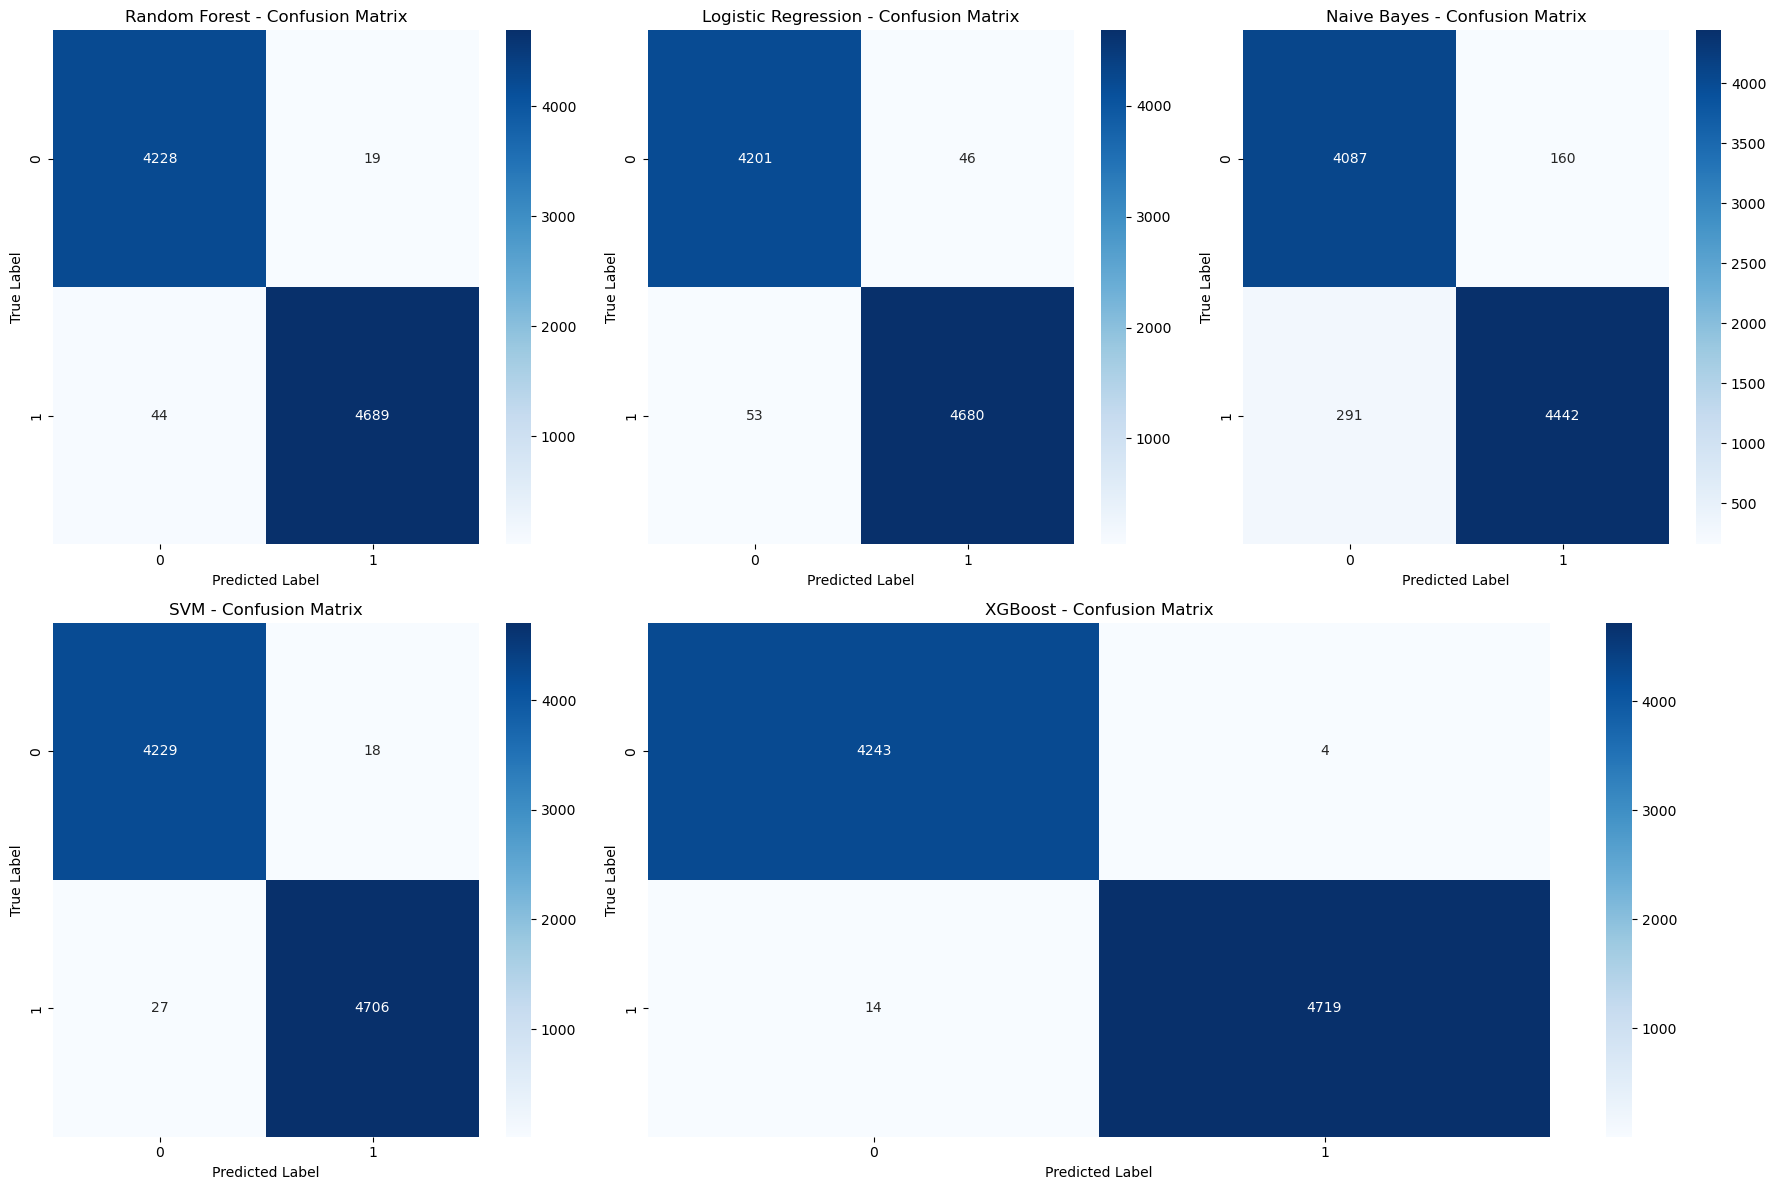

In [33]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplot_mosaic(
    [
        ["model1", "model2", "model3"],  # Upper row (3 models)
        ["model4", "model5", "model5"],  # Lower row (2 models stretched)
    ],
    figsize=(18, 12)
)

model_names = list(models.keys())

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[f"model{i+1}"])
    axes[f"model{i+1}"].set_title(f"{name} - Confusion Matrix")
    axes[f"model{i+1}"].set_xlabel("Predicted Label")
    axes[f"model{i+1}"].set_ylabel("True Label")

plt.tight_layout()
plt.show()
